# **Importing necessary packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
from IPython.display import Image
from sklearn import tree
from imblearn.over_sampling import SMOTE
import io
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from google.colab import files

# **Reading csv file and Preprocessing**


In [ ]:
df = pd.read_csv('/content/merged_output_file.csv')

In [ ]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
num_repeats=10
X=df.drop(['malignancy','patient_id'],axis=1)
y=df['malignancy']
col_names=X.columns
for repetition in range(num_repeats):
  X_train1,X_test,y_train1,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=repetition)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         778 non-null    int64  
 1   malignancy         778 non-null    int64  
 2   Area               778 non-null    float64
 3   Perimeter          778 non-null    float64
 4   Eccentricity       778 non-null    float64
 5   Solidity           778 non-null    float64
 6   Major_Axis_Length  778 non-null    float64
 7   Minor_Axis_Length  778 non-null    float64
 8   Compactness        778 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.8 KB


In [ ]:
df.head(10)

,patient_id,malignancy,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
0,1,5,262.0,68.734019,0.715748,0.885135,22.310861,15.580988,18.031929
1,2,5,68.0,45.213203,0.975082,0.715789,22.146639,4.913129,30.062261
2,3,2,38.0,21.485281,0.779856,0.950000,8.947843,5.600983,12.147824
3,4,1,10.0,9.449747,0.766215,0.909091,4.477016,2.876861,8.929773
4,5,3,36.0,19.656854,0.527556,0.972973,7.338877,6.234523,10.733109
5,6,2,51.0,28.863961,0.618771,0.822581,9.855094,7.741881,16.335848
6,7,5,80.0,65.870058,0.658644,0.298507,24.010285,18.066647,54.235806
7,8,3,23.0,16.485281,0.719230,0.884615,6.600927,4.586140,11.815848
8,9,2,29.0,18.485281,0.817284,0.935484,8.063123,4.646257,11.782953
9,10,2,12.0,10.414214,0.803846,0.923077,5.044025,3.000375,9.037987


In [ ]:
df.columns

Index(['patient_id', 'malignancy', 'Area', 'Perimeter', 'Eccentricity',
       'Solidity', 'Major_Axis_Length', 'Minor_Axis_Length', 'Compactness'],
      dtype='object')

In [ ]:
df.shape

(778, 9)

In [ ]:
df.isna().any()

patient_id           False
malignancy           False
Area                 False
Perimeter            False
Eccentricity         False
Solidity             False
Major_Axis_Length    False
Minor_Axis_Length    False
Compactness          False
dtype: bool

In [ ]:
df.describe()

,patient_id,malignancy,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,403.182519,2.609254,51.907455,21.991647,0.600037,0.792059,8.648617,5.567109,11.111123
std,234.144226,1.448922,91.152039,19.278036,0.282538,0.317347,7.047461,4.123545,6.472371
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199.250000,2.000000,14.000000,11.071068,0.510770,0.840145,5.206502,3.411992,9.142697
50%,403.500000,3.000000,28.000000,17.899495,0.670970,0.919916,7.288641,4.973191,11.216386
75%,603.750000,3.750000,54.000000,27.071068,0.803837,0.955473,10.401603,7.046492,13.322061
max,815.000000,5.000000,1724.000000,194.001046,0.994546,1.000000,69.661003,45.688223,65.739278


In [ ]:
df.duplicated().sum()

0

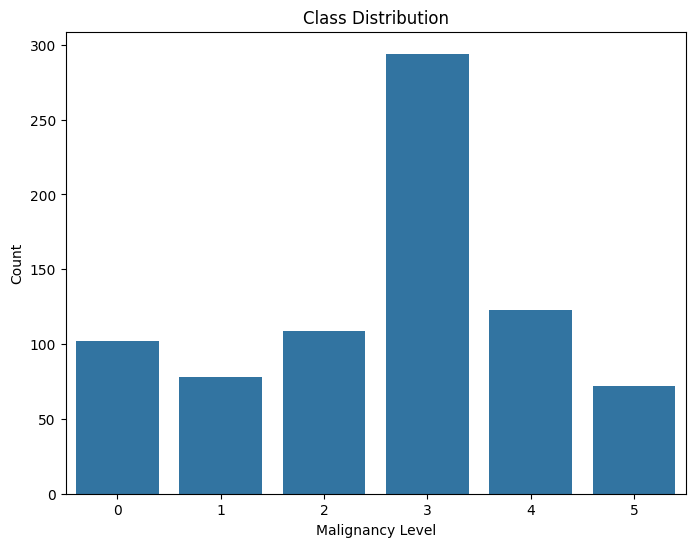

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='malignancy', data=df)
plt.title('Class Distribution')
plt.xlabel('Malignancy Level')
plt.ylabel('Count')
plt.show()

The figure clearly shows that there is an imbalance where class 3 has the highest number of samples, and this issue might cause bias in classification if not addressed.

Text(0.5, 1.0, 'Features Correlating with Malignancy')

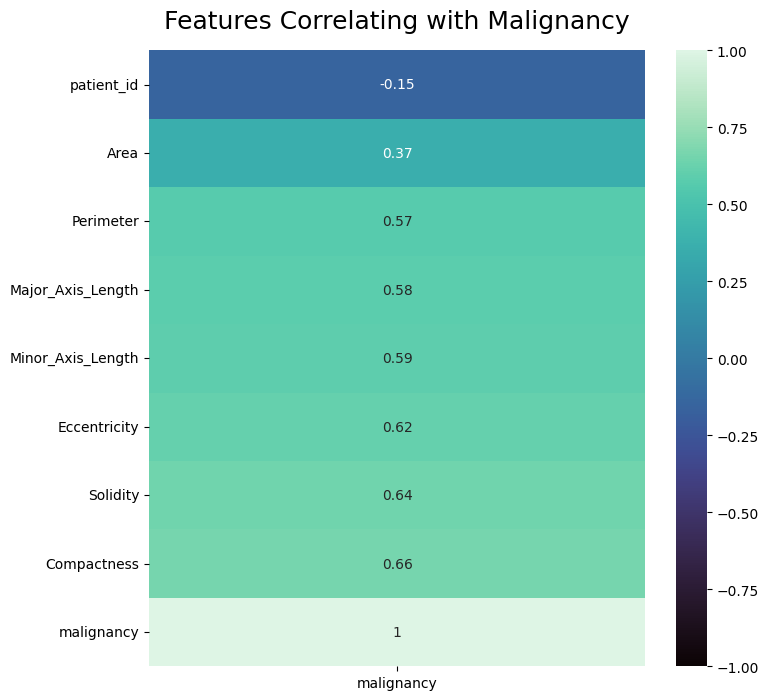

In [ ]:
df.corr()[['malignancy']].sort_values(by='malignancy')
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(df.corr()[['malignancy']].sort_values(by='malignancy'), vmin=-1, vmax=1, annot=True, cmap='mako')
heatmap.set_title('Features Correlating with Malignancy', fontdict={'fontsize':18}, pad=16)


<Figure size 640x480 with 0 Axes>

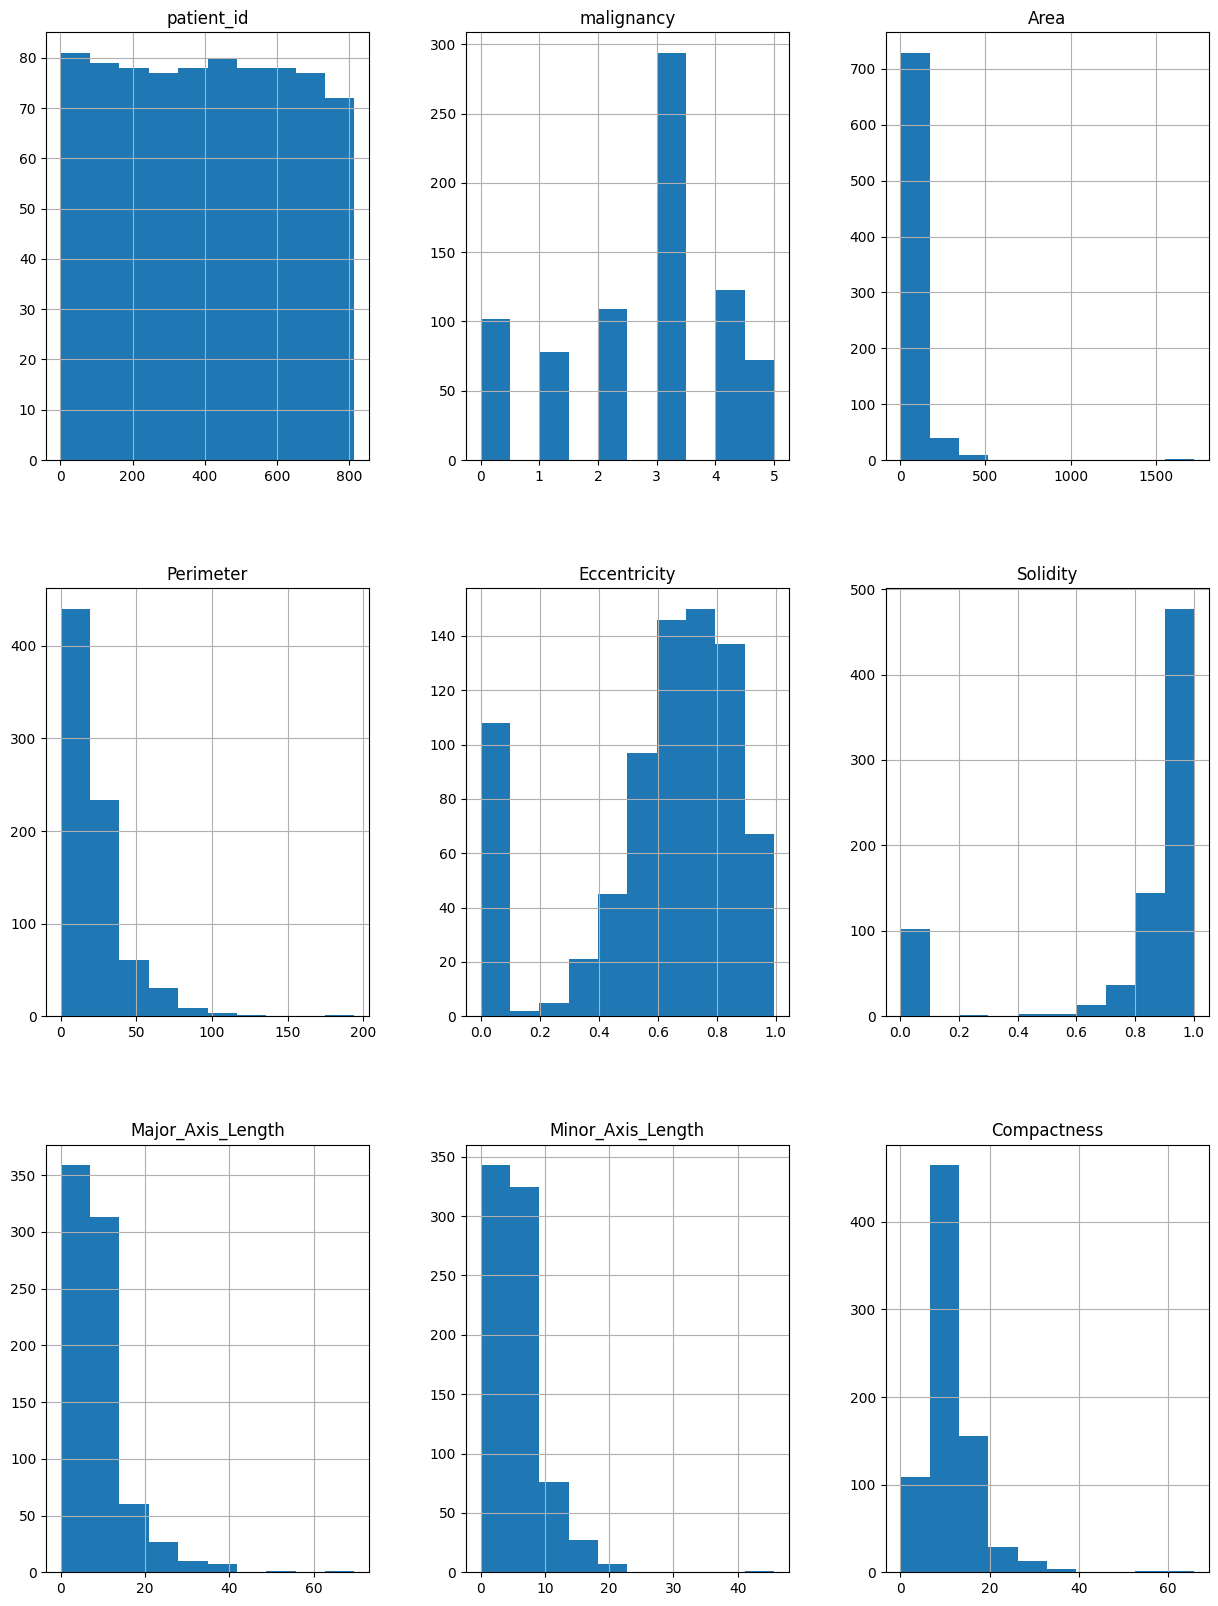

<Figure size 640x480 with 0 Axes>

In [ ]:
#histogram of each input variable to get an idea of the distribution
df.hist(figsize=(15,20))
plt.figure()

The histograms show that the features are not normally distributed due to having noise or outlier values. Area, Major_axis_length, perimeter, minor_axis_length, and compactness are right skewed. Solidity is left skewed.

In [ ]:
X.head()

,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
0,262.0,68.734019,0.715748,0.885135,22.310861,15.580988,18.031929
1,68.0,45.213203,0.975082,0.715789,22.146639,4.913129,30.062261
2,38.0,21.485281,0.779856,0.950000,8.947843,5.600983,12.147824
3,10.0,9.449747,0.766215,0.909091,4.477016,2.876861,8.929773
4,36.0,19.656854,0.527556,0.972973,7.338877,6.234523,10.733109


In [ ]:
y.head()

0    5
1    5
2    2
3    1
4    3
Name: malignancy, dtype: int64

In [ ]:
x=col_names

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train1, y_train1)

SMOTE was used to handle the class imbalance problem

In [ ]:
print(X_train.shape)

(1236, 7)


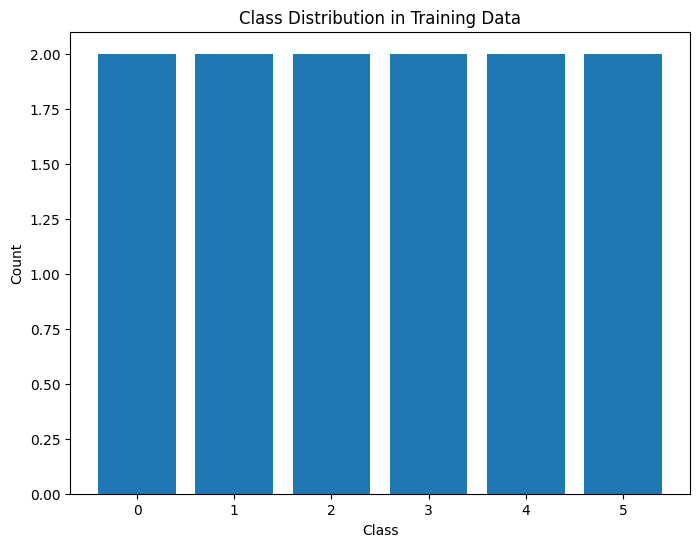

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(y_train, height=2)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Data')
plt.show()

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

#normalizing x_train dataset
standard = MinMaxScaler().fit_transform(X_train)
X_train = pd.DataFrame(standard)



In [ ]:
X_train

,0,1,2,3,4,5,6
0,0.039749,0.103604,0.778888,0.904762,0.088923,0.176497,0.153097
1,0.135983,0.200248,0.334635,0.984848,0.134189,0.397150,0.167183
2,0.156904,0.236423,0.382053,0.914634,0.148222,0.430311,0.201970
3,0.062762,0.142882,0.677290,0.909091,0.104532,0.242484,0.184418
4,0.121339,0.198430,0.666543,0.966667,0.143717,0.337711,0.183974
...,...,...,...,...,...,...,...
1231,0.164565,0.414860,0.865385,0.482476,0.344858,0.470640,0.601599
1232,0.060488,0.158448,0.943631,0.898333,0.163639,0.150468,0.235479
1233,0.122934,0.216761,0.745179,0.874262,0.157244,0.331354,0.216771
1234,0.145392,0.230236,0.687263,0.928861,0.163623,0.374548,0.207882


In [ ]:
for i in range(len(x)):
    X_train= X_train.rename({i:x[i]}, axis=1)
X_train

,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
0,0.039749,0.103604,0.778888,0.904762,0.088923,0.176497,0.153097
1,0.135983,0.200248,0.334635,0.984848,0.134189,0.397150,0.167183
2,0.156904,0.236423,0.382053,0.914634,0.148222,0.430311,0.201970
3,0.062762,0.142882,0.677290,0.909091,0.104532,0.242484,0.184418
4,0.121339,0.198430,0.666543,0.966667,0.143717,0.337711,0.183974
...,...,...,...,...,...,...,...
1231,0.164565,0.414860,0.865385,0.482476,0.344858,0.470640,0.601599
1232,0.060488,0.158448,0.943631,0.898333,0.163639,0.150468,0.235479
1233,0.122934,0.216761,0.745179,0.874262,0.157244,0.331354,0.216771
1234,0.145392,0.230236,0.687263,0.928861,0.163623,0.374548,0.207882


In [ ]:
X_train.head()

,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
0,0.039749,0.103604,0.778888,0.904762,0.088923,0.176497,0.153097
1,0.135983,0.200248,0.334635,0.984848,0.134189,0.397150,0.167183
2,0.156904,0.236423,0.382053,0.914634,0.148222,0.430311,0.201970
3,0.062762,0.142882,0.677290,0.909091,0.104532,0.242484,0.184418
4,0.121339,0.198430,0.666543,0.966667,0.143717,0.337711,0.183974


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1236, 7)
(234, 7)
(1236,)
(234,)


In [ ]:
X_test.head()

,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
554,19.0,14.242641,0.842756,0.950000,6.652877,3.581215,10.676464
521,27.0,16.828427,0.529942,0.964286,6.393645,5.422028,10.488739
341,43.0,23.313709,0.633909,0.955556,8.700940,6.729372,12.640209
216,247.0,58.041631,0.520319,0.942748,19.322400,16.500789,13.638991
139,38.0,20.278175,0.651944,0.791667,8.614818,6.532330,10.821167


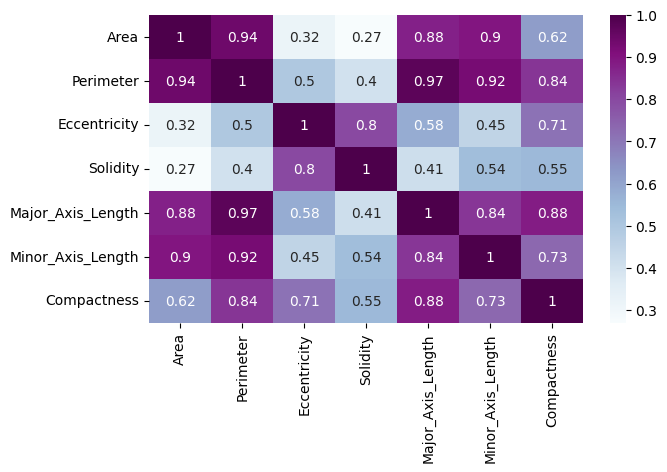

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(X_train.corr(),annot=True,cmap='BuPu') #draws  heatmap
plt.show()

<Axes: xlabel='Area', ylabel='Perimeter'>

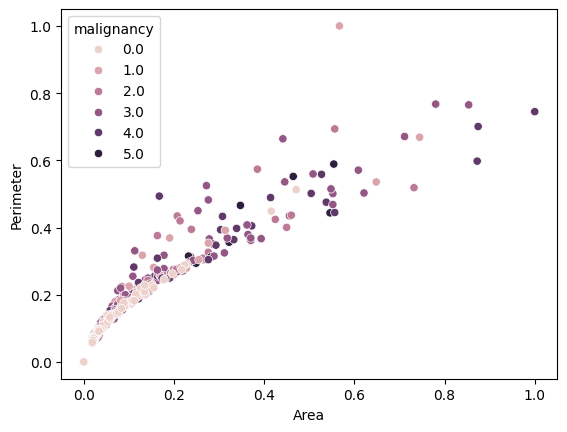

In [ ]:
sns.scatterplot(x=X_train['Area'],y=X_train['Perimeter'],hue=df['malignancy'])

<Axes: xlabel='Major_Axis_Length', ylabel='Perimeter'>

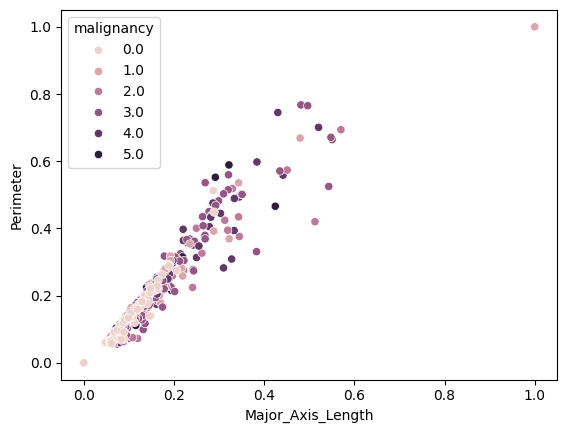

In [ ]:
sns.scatterplot(x=X_train['Major_Axis_Length'],y=X_train['Perimeter'],hue=df['malignancy'])

<Axes: xlabel='Area', ylabel='Minor_Axis_Length'>

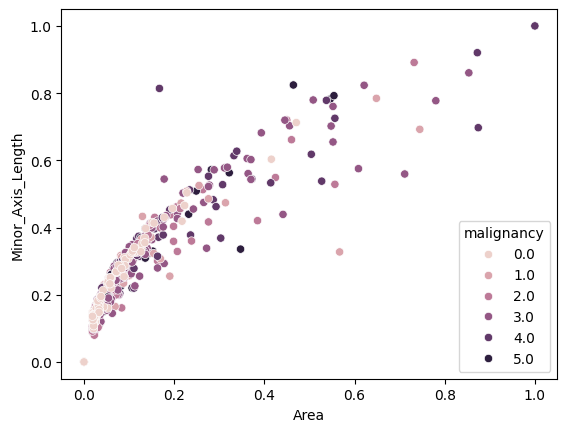

In [ ]:
sns.scatterplot(x=X_train['Area'],y=X_train['Minor_Axis_Length'],hue=df['malignancy'])

<Axes: xlabel='Minor_Axis_Length', ylabel='Perimeter'>

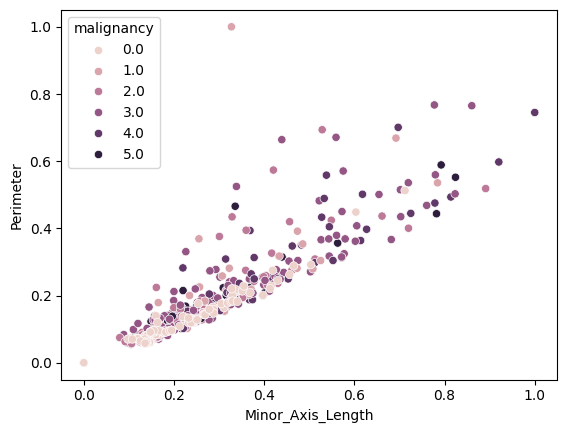

In [ ]:
sns.scatterplot(x=X_train['Minor_Axis_Length'],y=X_train['Perimeter'],hue=df['malignancy'])

<Axes: xlabel='Major_Axis_Length', ylabel='Area'>

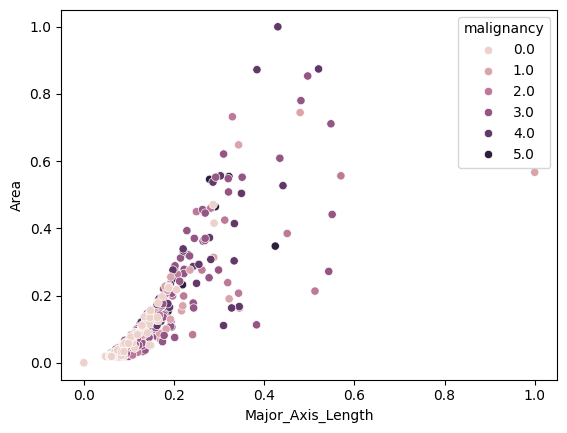

In [ ]:
sns.scatterplot(x=X_train['Major_Axis_Length'],y=X_train['Area'],hue=df['malignancy'])

# **Classification Algorithms**

In [ ]:
import pydotplus
#Decision Tree
dtree_classifier=DecisionTreeClassifier(criterion='gini',splitter= 'best',random_state=None,class_weight="balanced")
dtree_classifier.fit(X_train,y_train)
y_pred=dtree_classifier.predict(X_test)
tree_accuracy=accuracy_score(y_test,y_pred)
tree_precision=precision_score(y_test,y_pred,average="weighted")
tree_recall=recall_score(y_test,y_pred,average="weighted")
print("Decision Tree Accuracy before Optimization: ", tree_accuracy)

Decision Tree Accuracy before Optimization:  0.3504273504273504


In [ ]:
#Decision tree hyperparameter tuning
import numpy as np
# Define the parameter distributions
params_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.random.randint(4, 40, size=10),  # Example: Generates 10 random integers between 4 and 40
    'max_leaf_nodes': np.random.randint(1000, 20000, size=10),
    'min_samples_leaf': np.random.randint(20, 100, size=10),
    'min_samples_split': np.random.randint(40, 200, size=10)
}

# Create and fit a decision tree classifier
clf_tuned = DecisionTreeClassifier(random_state=42,class_weight="balanced")
random_search = RandomizedSearchCV(clf_tuned, params_dist, cv=7,random_state=42)
random_search.fit(X_train, y_train)
best_estimator = random_search.best_estimator_

# Access the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)
best_estimator

Best hyperparameters: {'min_samples_split': 50, 'min_samples_leaf': 46, 'max_leaf_nodes': 7460, 'max_depth': 24, 'criterion': 'entropy'}


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=24, max_leaf_nodes=7460, min_samples_leaf=46,
                       min_samples_split=50, random_state=42)

In [ ]:
#Decision Tree after optimization
dtree_classifier_optimized=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=29, max_leaf_nodes=19166, min_samples_leaf=55,
                       min_samples_split=96, random_state=42)
dtree_classifier_optimized.fit(X_train,y_train)
y_pred_tree_opt=dtree_classifier_optimized.predict(X_test)
tree_accuracy_opt=accuracy_score(y_test,y_pred_tree_opt)
print("Decision Tree Accuracy after Optimization:", tree_accuracy_opt)


Decision Tree Accuracy after Optimization: 0.2777777777777778


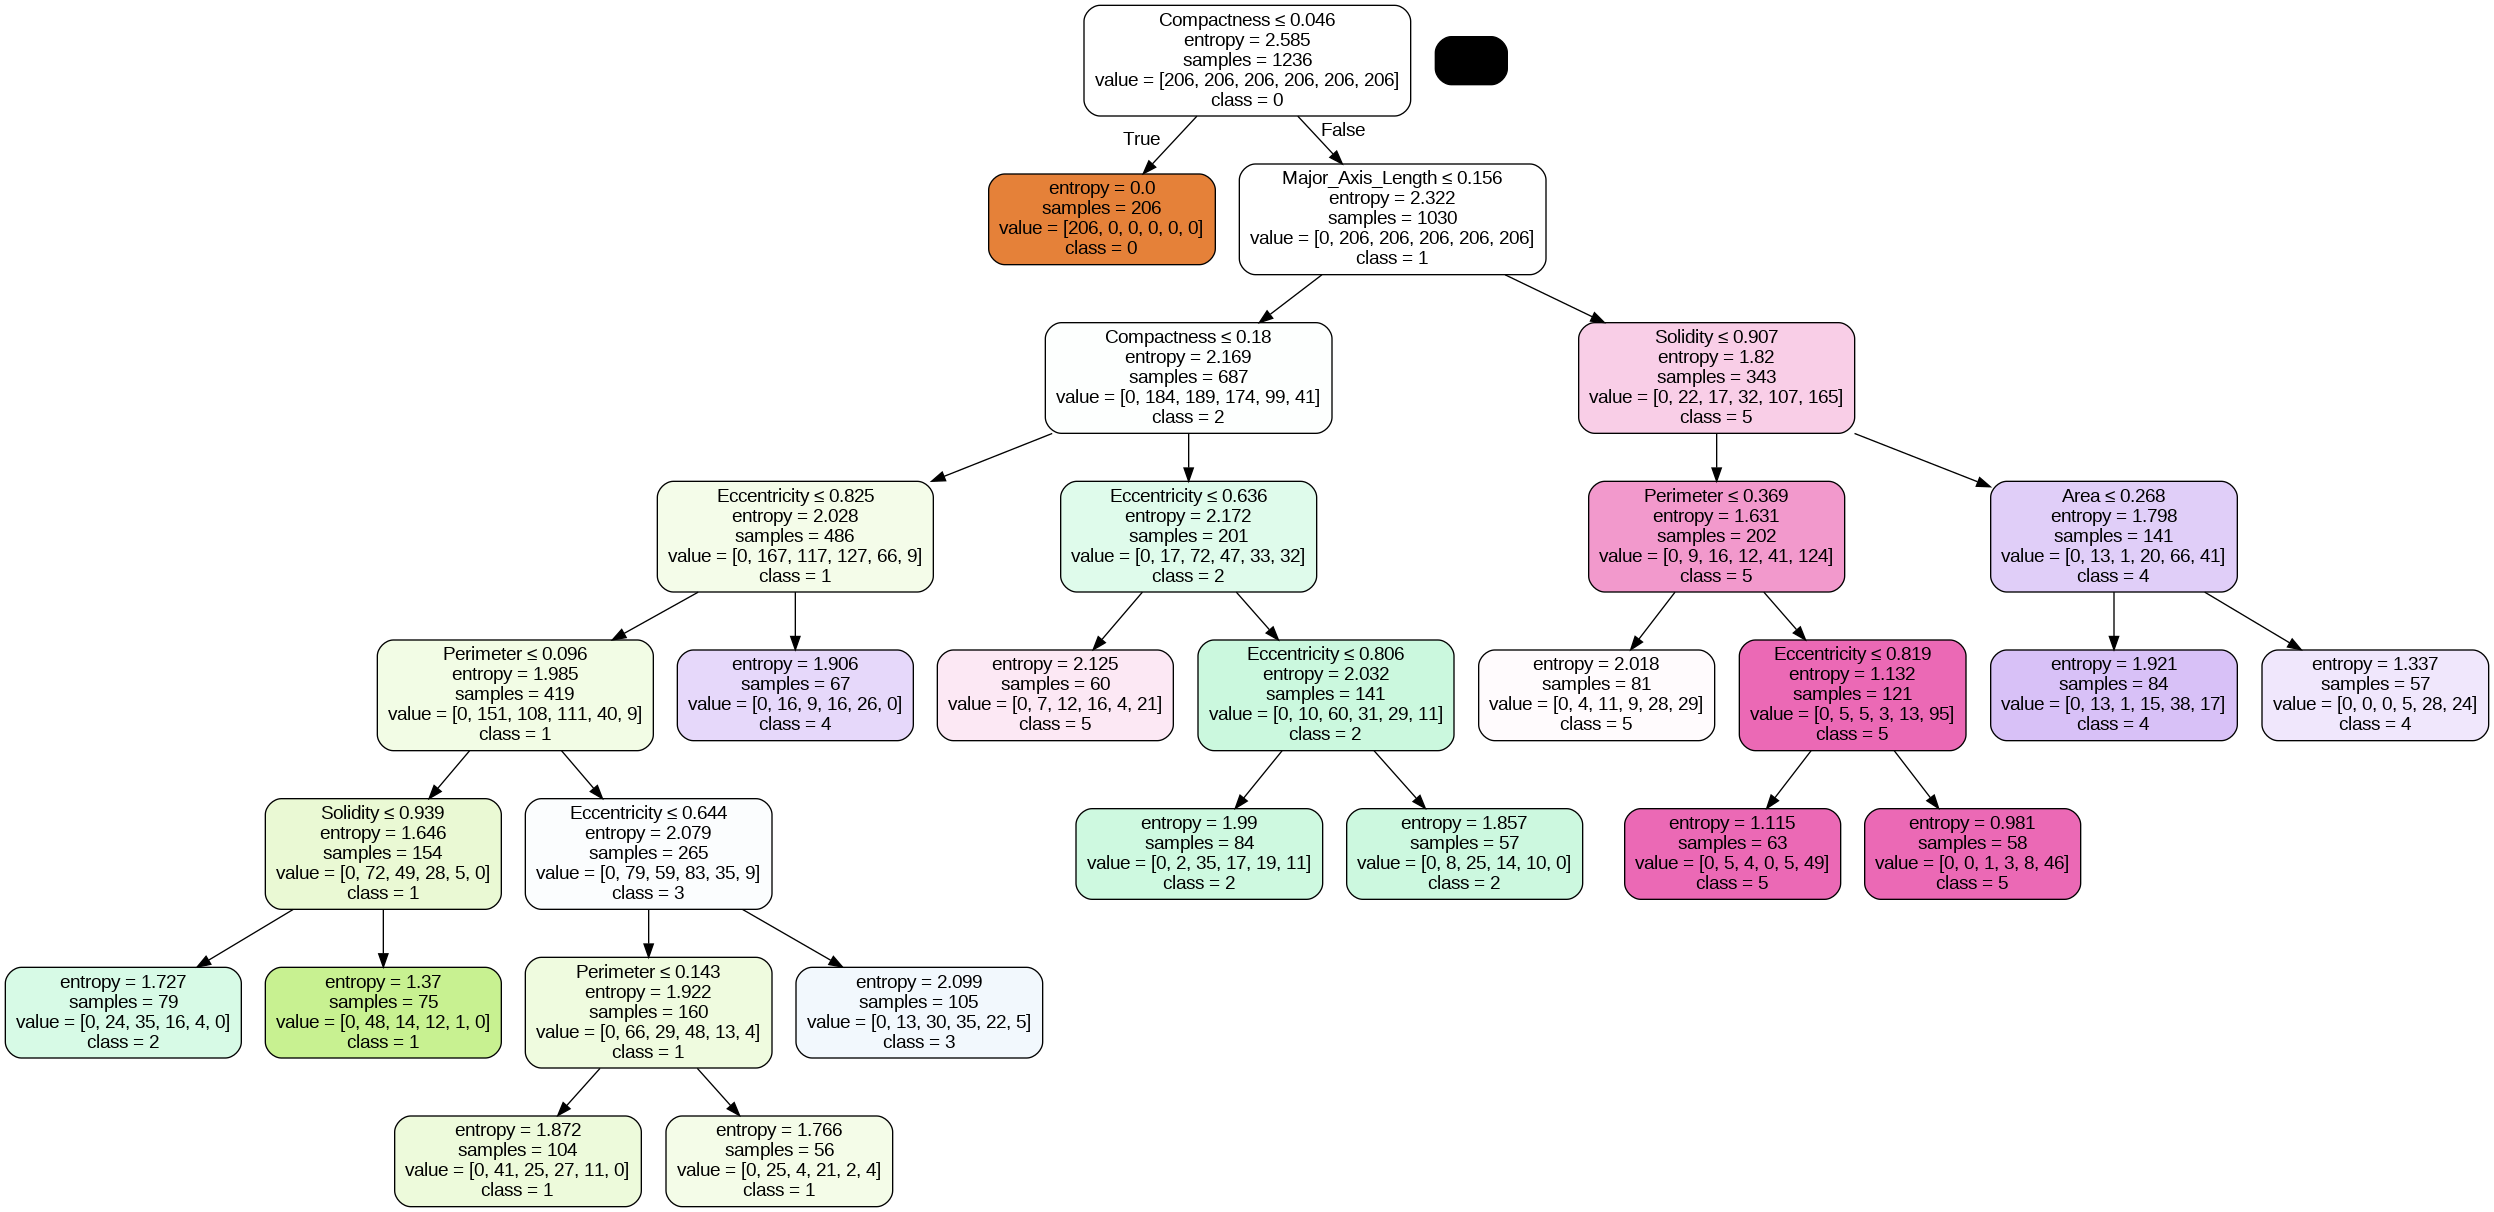

In [ ]:
#Visualizing Decision Tree
Names=list(X.columns.values)
# Convert class names to strings
class_names = [str(class_label) for class_label in np.unique(y)]
dot_data = tree.export_graphviz(dtree_classifier_optimized, out_file=None, filled=True, rounded=True,special_characters=True,feature_names=Names,class_names=class_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [ ]:
#Decision Tree Metrics
from sklearn.metrics import accuracy_score
matrix = confusion_matrix(y_test, y_pred_tree_opt)
print(matrix)
report = classification_report(y_test, y_pred_tree_opt)
print(report)

[[31  0  0  0  0  0]
 [ 0  0  0  0 19  4]
 [ 0  0  0  0 21 12]
 [ 0  0  0  0 71 17]
 [ 0  0  0  0 22 15]
 [ 0  0  0  0 10 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        88
           4       0.15      0.59      0.24        37
           5       0.20      0.55      0.29        22

    accuracy                           0.28       234
   macro avg       0.23      0.36      0.26       234
weighted avg       0.18      0.28      0.20       234



In [ ]:
dtree_classifier_optimized.classes_
classes=str(dtree_classifier_optimized.classes_)
classes

'[0 1 2 3 4 5]'

In [ ]:
#K-fold cross-validation for Decision Tree
dtree_kfold=DecisionTreeClassifier(class_weight='balanced')
accuracies_dtree_kfold = cross_val_score(dtree_kfold, X_train, y_train, cv = 10)
print(accuracies_dtree_kfold)
res_dt_k=accuracies_dtree_kfold.max()*100
print("Decision Tree K-Fold Validation Mean Accuracy: {:.2f} %".format(res_dt_k))

[0.5483871  0.53225806 0.55645161 0.66129032 0.64516129 0.66935484
 0.62601626 0.6097561  0.66666667 0.6504065 ]
Decision Tree K-Fold Validation Mean Accuracy: 66.94 %


In [ ]:
#Grid Search for hyperparameter tuning of Random Forest
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 10, 15, 20],
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 170, 200]

}

random_forest = RandomForestClassifier(class_weight="balanced")
grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid,
                          cv = 10, n_jobs = -1, verbose = 2)


grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'bootstrap': True, 'max_depth': 20, 'n_estimators': 100}


In [ ]:
#Random Forest Classifier
forest = RandomForestClassifier(criterion='gini',bootstrap=True,
                                 n_estimators=200,
                                 max_depth=20,
                                 random_state=None,
                                 n_jobs=2,class_weight="balanced")

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
random_forest_accuracy =accuracy_score(y_test,y_pred_forest)
random_forest_precision=precision_score(y_test,y_pred_forest,average="weighted")
random_forest_recall = recall_score(y_test,y_pred_forest,average="weighted")
print('Random Forest Accuracy: %.2f' % round(accuracy_score(y_test, y_pred_forest),2))

Random Forest Accuracy: 0.29


In [ ]:
#Random Forest Metrics
matrix = confusion_matrix(y_test, y_pred_forest)
print(matrix)
report = classification_report(y_test, y_pred_forest)
print(report)

[[31  0  0  0  0  0]
 [ 0  0  0  0 23  0]
 [ 0  0  0  0 33  0]
 [ 0  0  0  0 88  0]
 [ 0  0  0  0 37  0]
 [ 0  0  0  0 22  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        88
           4       0.18      1.00      0.31        37
           5       0.00      0.00      0.00        22

    accuracy                           0.29       234
   macro avg       0.20      0.33      0.22       234
weighted avg       0.16      0.29      0.18       234



In [ ]:
#K-fold cross-validation for Random Forest
foresttree_kfold=RandomForestClassifier(class_weight='balanced')
accuracies_foresttree_kfold = cross_val_score(foresttree_kfold, X_train, y_train, cv = 10)
print(accuracies_foresttree_kfold)
res_ft_k=accuracies_foresttree_kfold.max()*100
print("Random Forest Tree K-Fold Validation Mean Accuracy: {:.2f} %".format(res_ft_k))

[0.66129032 0.58870968 0.61290323 0.69354839 0.7016129  0.70967742
 0.69918699 0.67479675 0.79674797 0.68292683]
Random Forest Tree K-Fold Validation Mean Accuracy: 79.67 %


In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_naive = naive_bayes_model.predict(X_test)
print('Naive Bayes Accuracy: %.2f' % round(accuracy_score(y_test, y_pred_naive),2))
matrix = confusion_matrix(y_test, y_pred_naive)
print(matrix)
report = classification_report(y_test, y_pred_naive)
print(report)
naive_bayes_accuracy=accuracy_score(y_test,y_pred_naive)
naive_bayes_precision=precision_score(y_test,y_pred_naive,average="weighted")
naive_bayes_recall=recall_score(y_test,y_pred_naive,average="weighted")


Naive Bayes Accuracy: 0.23
[[31  0  0  0  0  0]
 [ 0  0  0  0  0 23]
 [ 0  0  0  0  0 33]
 [ 0  0  0  0  0 88]
 [ 0  0  0  0  0 37]
 [ 0  0  0  0  0 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        88
           4       0.00      0.00      0.00        37
           5       0.11      1.00      0.20        22

    accuracy                           0.23       234
   macro avg       0.18      0.33      0.20       234
weighted avg       0.14      0.23      0.15       234



In [ ]:
#Grid Search for hyperparameter tuning of Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)

print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.03511191734215131)


In [ ]:
naive_bayes_model_optimized = GaussianNB(var_smoothing=0.006579332246575682)
naive_bayes_model_optimized.fit(X_train, y_train)
y_pred_naive_optimized = naive_bayes_model_optimized.predict(X_test)
print('Naive Bayes Accuracy after optimization: %.2f' % round(accuracy_score(y_test, y_pred_naive_optimized),2))

Naive Bayes Accuracy after optimization: 0.23


In [ ]:
#K-fold cross-validation for Naive Bayes
naive_kfold=GaussianNB()
accuracies_naive_kfold = cross_val_score(naive_kfold, X_train, y_train, cv = 10)
print(accuracies_naive_kfold)
res_naive_k=accuracies_naive_kfold.max()*100
print("Naive Bayes K-Fold Validation Mean Accuracy: {:.2f} %".format(res_naive_k))

[0.50806452 0.47580645 0.46774194 0.49193548 0.5        0.49193548
 0.4796748  0.48780488 0.51219512 0.51219512]
Naive Bayes K-Fold Validation Mean Accuracy: 51.22 %


In [ ]:
#Adaboost Classifier
ada_boost = AdaBoostClassifier(n_estimators=42,learning_rate=1,random_state=42)
ada_boost.fit(X_train, y_train)
y_out_ada = ada_boost.predict(X_test)
print("AdaBoost Accuracy:",round(metrics.accuracy_score(y_test, y_out_ada),2))
matrix = confusion_matrix(y_test, y_out_ada)
print(matrix)
report = classification_report(y_test, y_out_ada)
print(report)
adaboost_accuracy=accuracy_score(y_test,y_out_ada)
adaboost_precision=precision_score(y_test,y_out_ada,average="weighted")
adaboost_recall=recall_score(y_test,y_out_ada,average="weighted")


AdaBoost Accuracy: 0.3
[[31  0  0  0  0  0]
 [ 0  0  1  1 20  1]
 [ 0  0  0  0 33  0]
 [ 0  0  7  5 74  2]
 [ 0  0  0  3 34  0]
 [ 0  0  0  1 21  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        33
           3       0.50      0.06      0.10        88
           4       0.19      0.92      0.31        37
           5       0.00      0.00      0.00        22

    accuracy                           0.30       234
   macro avg       0.28      0.33      0.24       234
weighted avg       0.35      0.30      0.22       234



In [ ]:
#K-fold cross-validation for AdaBoost
adaboost_kfold=AdaBoostClassifier()
accuracies_adaboost_kfold = cross_val_score(adaboost_kfold, X_train, y_train, cv = 10)
print(accuracies_adaboost_kfold)
res_adaboost_k=accuracies_adaboost_kfold.max()*100
print("AdaBoost K-Fold Validation Mean Accuracy: {:.2f} %".format(res_adaboost_k))

[0.41129032 0.42741935 0.43548387 0.41935484 0.28225806 0.45967742
 0.43089431 0.35772358 0.41463415 0.43902439]
AdaBoost K-Fold Validation Mean Accuracy: 45.97 %


In [ ]:
#XGBoost Classifier
import xgboost as xgb
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_out_xgb = xgb_classifier.predict(X_test)
print("XGBoost Accuracy:",round(metrics.accuracy_score(y_test, y_out_xgb),2))
matrix = confusion_matrix(y_test, y_out_xgb)
print(matrix)
report = classification_report(y_test, y_out_xgb)
print(report)
xgboost_accuracy=accuracy_score(y_test,y_out_xgb)
xgboost_precision=precision_score(y_test,y_out_xgb,average="weighted")
xgboost_recall=recall_score(y_test,y_out_xgb,average="weighted")


XGBoost Accuracy: 0.35
[[31  0  0  0  0  0]
 [ 0  0  0  6  5 12]
 [ 0  0  0  7  5 21]
 [ 0  0  0 28 16 44]
 [ 0  0  0  3  8 26]
 [ 0  0  0  3  4 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        33
           3       0.60      0.32      0.41        88
           4       0.21      0.22      0.21        37
           5       0.13      0.68      0.21        22

    accuracy                           0.35       234
   macro avg       0.32      0.37      0.31       234
weighted avg       0.40      0.35      0.34       234



In [ ]:
#K-fold cross-validation for XGBoost
xgboost_kfold=XGBClassifier()
accuracies_xgboost_kfold = cross_val_score(xgboost_kfold, X_train, y_train, cv = 10)
print(accuracies_xgboost_kfold)
res_xgboost_k=accuracies_xgboost_kfold.max()*100
print("AdaBoost K-Fold Validation Mean Accuracy: {:.2f} %".format(res_xgboost_k))

[0.62903226 0.60483871 0.61290323 0.67741935 0.77419355 0.71774194
 0.68292683 0.69918699 0.75609756 0.72357724]
AdaBoost K-Fold Validation Mean Accuracy: 77.42 %


In [ ]:
#SVM Classifier with different kernel functions to compare performance
from sklearn import svm
linear_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo',random_state=42).fit(X_train, y_train)
rbf_svm = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo',random_state=42).fit(X_train, y_train)
poly_svm = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo',random_state=42).fit(X_train, y_train)
sig_svm = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo',random_state=42).fit(X_train, y_train)

In [ ]:
linear_pred = linear_svm.predict(X_test)
poly_pred = poly_svm.predict(X_test)
rbf_pred = rbf_svm.predict(X_test)
sig_pred = sig_svm.predict(X_test)


In [ ]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear_svm.score(X_test, y_test)
accuracy_poly = poly_svm.score(X_test, y_test)
accuracy_rbf = rbf_svm.score(X_test, y_test)
accuracy_sig = sig_svm.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)
lin_precision=precision_score(y_test,linear_pred,average="weighted")
lin_recall=recall_score(y_test,linear_pred,average="weighted")


Accuracy Linear Kernel: 0.2264957264957265
Accuracy Polynomial Kernel: 0.27350427350427353
Accuracy Radial Basis Kernel: 0.2905982905982906
Accuracy Sigmoid Kernel: 0.23076923076923078


In [ ]:
#K-fold cross-validation for Linear SVM
linear_svm_kfold=svm.SVC(kernel='linear', C=1, decision_function_shape='ovo',random_state=42)
accuracies_linear_svm_kfold = cross_val_score(linear_svm_kfold, X_train, y_train, cv = 10)
print(accuracies_linear_svm_kfold)
res_linear_svm_k=accuracies_linear_svm_kfold.max()*100
print("Linear SVM K-Fold Validation Mean Accuracy: {:.2f} %".format(res_linear_svm_k))

[0.58870968 0.47580645 0.41935484 0.48387097 0.49193548 0.50806452
 0.49593496 0.52845528 0.51219512 0.51219512]
Linear SVM K-Fold Validation Mean Accuracy: 58.87 %


In [ ]:
#K-fold cross-validation for RBF SVM
rbf_svm_kfold=svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo',random_state=42)
accuracies_rbf_svm_kfold = cross_val_score(rbf_svm_kfold, X_train, y_train, cv = 10)
print(accuracies_rbf_svm_kfold)
res_rbf_svm_k=accuracies_rbf_svm_kfold.max()*100
print("RBF SVM K-Fold Validation Mean Accuracy: {:.2f} %".format(res_rbf_svm_k))

[0.55645161 0.45967742 0.46774194 0.46774194 0.50806452 0.48387097
 0.4796748  0.48780488 0.53658537 0.50406504]
RBF SVM K-Fold Validation Mean Accuracy: 55.65 %


In [ ]:
#K-fold cross-validation for Sigmoid SVM
sigmoid_svm_kfold=svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo',random_state=42)
accuracies_sigmoid_svm_kfold = cross_val_score(sigmoid_svm_kfold, X_train, y_train, cv = 10)
print(accuracies_sigmoid_svm_kfold)
res_sigmoid_svm_k=accuracies_sigmoid_svm_kfold.max()*100
print("Sigmoid SVM K-Fold Validation Mean Accuracy: {:.2f} %".format(res_sigmoid_svm_k))

[0.37096774 0.36290323 0.39516129 0.37903226 0.40322581 0.37096774
 0.38211382 0.39837398 0.33333333 0.41463415]
Sigmoid SVM K-Fold Validation Mean Accuracy: 41.46 %


In [ ]:
#K-fold cross-validation for Polynomial SVM
poly_svm_kfold=svm.SVC(kernel='poly', C=1, decision_function_shape='ovo',random_state=42)
accuracies_poly_svm_kfold = cross_val_score(poly_svm_kfold, X_train, y_train, cv = 10)
print(accuracies_poly_svm_kfold)
res_poly_svm_k=accuracies_poly_svm_kfold.max()*100
print("Polynomial SVM K-Fold Validation Mean Accuracy: {:.2f} %".format(res_poly_svm_k))

[0.49193548 0.49193548 0.5        0.44354839 0.53225806 0.49193548
 0.47154472 0.48780488 0.51219512 0.50406504]
Polynomial SVM K-Fold Validation Mean Accuracy: 53.23 %


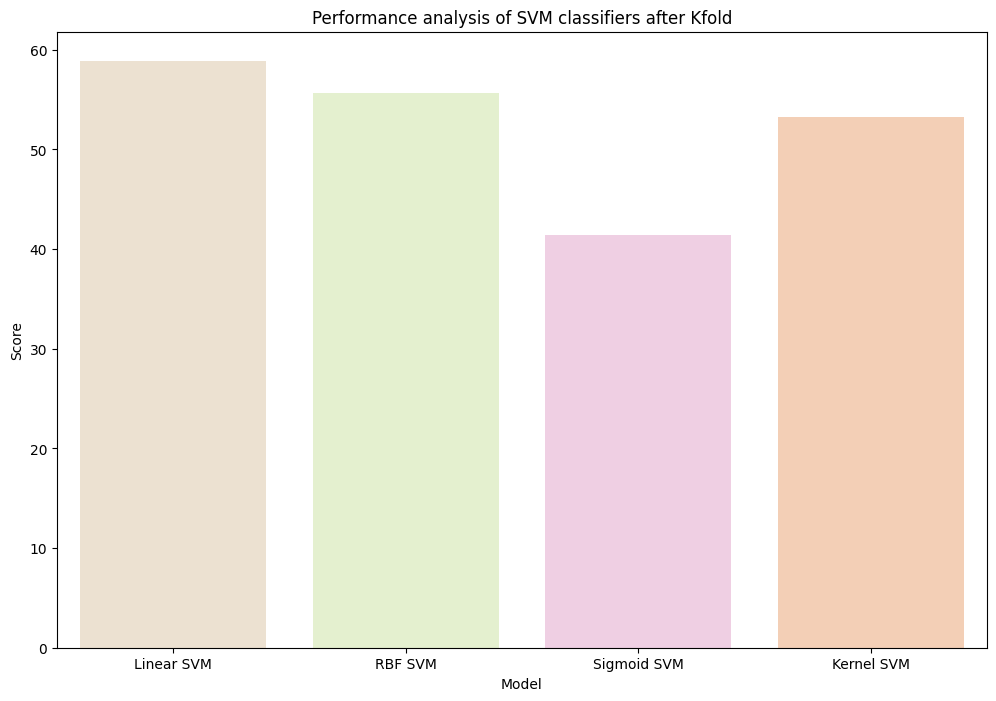

In [ ]:
data={'Model': ['Linear SVM', 'RBF SVM',  "Sigmoid SVM",'Kernel SVM'], "Score": [float(res_linear_svm_k), float(res_rbf_svm_k), float(res_sigmoid_svm_k),float(res_poly_svm_k)]}
dataPer = pd.DataFrame(data)
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data=dataPer, palette="Pastel2_r")
plt.title('Performance analysis of SVM classifiers after Kfold')
plt.show()

Epoch 1/200
6/6 [==============================] - 3s 53ms/step - loss: 2.9109 - accuracy: 0.1897 - val_loss: 2.0291 - val_accuracy: 0.1026 - lr: 1.0000e-04
Epoch 2/200
6/6 [==============================] - 0s 15ms/step - loss: 2.9223 - accuracy: 0.1769 - val_loss: 1.9116 - val_accuracy: 0.1581 - lr: 1.0000e-04
Epoch 3/200
6/6 [==============================] - 0s 15ms/step - loss: 2.7201 - accuracy: 0.1912 - val_loss: 1.8414 - val_accuracy: 0.1923 - lr: 1.0000e-04
Epoch 4/200
6/6 [==============================] - 0s 14ms/step - loss: 2.4815 - accuracy: 0.2083 - val_loss: 1.7966 - val_accuracy: 0.2009 - lr: 1.0000e-04
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 2.5121 - accuracy: 0.1997 - val_loss: 1.7570 - val_accuracy: 0.2607 - lr: 1.0000e-04
Epoch 6/200
6/6 [==============================] - 0s 14ms/step - loss: 2.4309 - accuracy: 0.2439 - val_loss: 1.7213 - val_accuracy: 0.3291 - lr: 1.0000e-04
Epoch 7/200
6/6 [==============================] - 0s 14ms

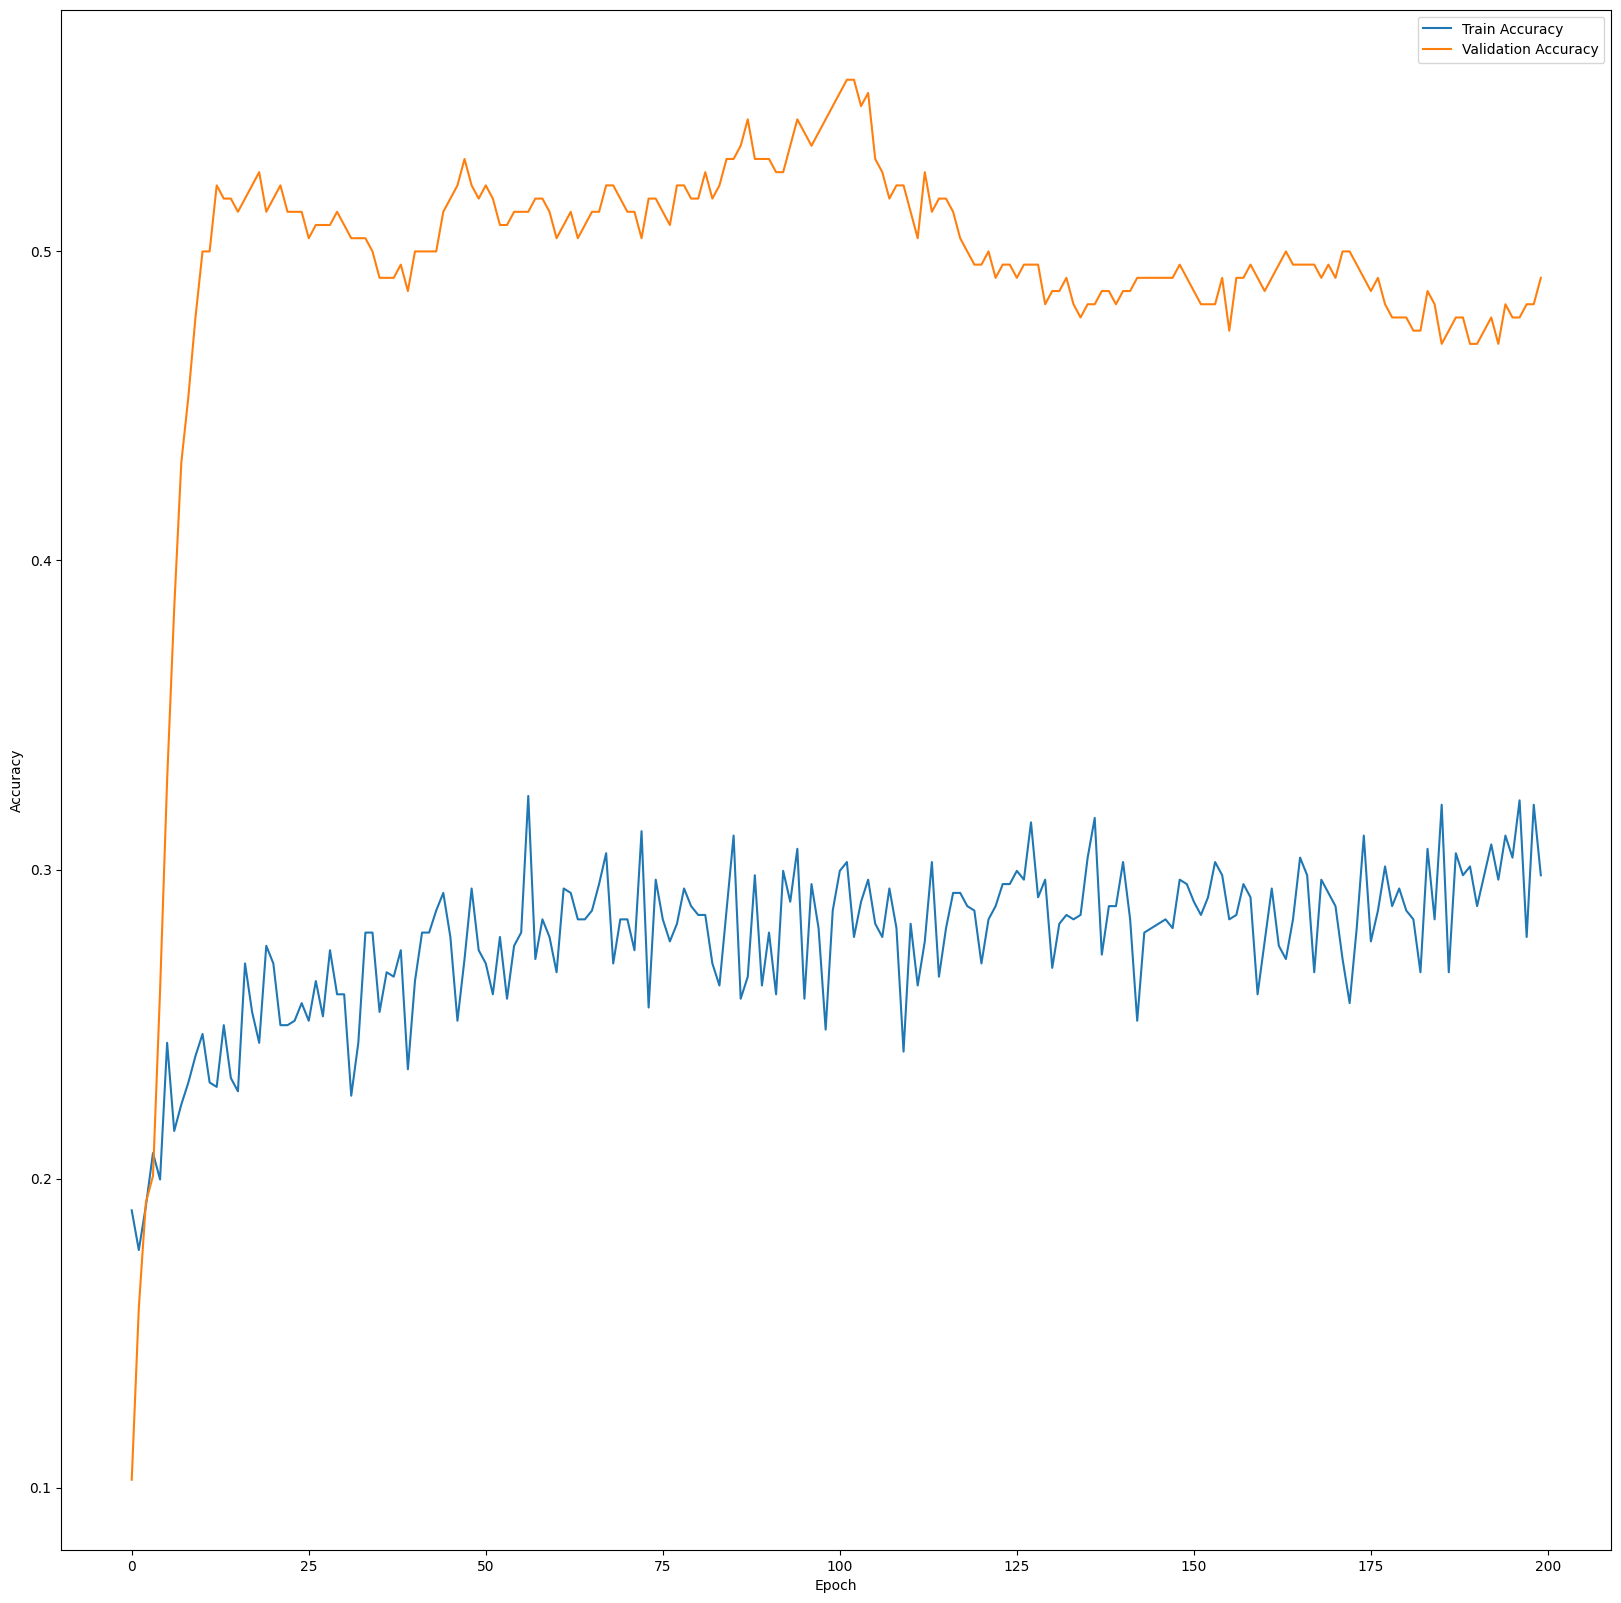

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

num_classes = 6

# Define the model for multi-class classification
model = Sequential()
model.add(Dense(512, input_dim=X.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with weighted sparse categorical crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with class weights and learning rate scheduler
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_test, y_test),
                    class_weight=class_weight_dict, callbacks=[LearningRateScheduler(lr_scheduler)])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test)

# Print classification report and confusion matrix
y_pred = np.argmax(predictions, axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Assuming you have X_train, X_test, y_train, y_test loaded

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Create CatBoost datasets
train_data = Pool(X_train, label=y_train)
test_data = Pool(X_test, label=y_test)

# Define parameters for CatBoost
params = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'MultiClass',
    'custom_metric': 'Accuracy',
    'verbose': 10,
    'class_weights': class_weight_dict  # Pass the computed class weights
}

# Train the CatBoost model
model = CatBoostClassifier(**params)
model.fit(train_data, eval_set=test_data, early_stopping_rounds=10)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluate the model
cat_boost_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {cat_boost_accuracy}')
cat_boost_precision=precision_score(y_test,y_pred,average="weighted")
cat_boost_recall=recall_score(y_test,y_pred,average="weighted")
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0:	learn: 1.7372323	test: 1.6837599	best: 1.6837599 (0)	total: 35.7ms	remaining: 35.6s
10:	learn: 1.4486773	test: 1.1900468	best: 1.1900468 (10)	total: 338ms	remaining: 30.4s
20:	learn: 1.3138681	test: 1.0000542	best: 1.0000542 (20)	total: 543ms	remaining: 25.3s
30:	learn: 1.2339122	test: 0.8992379	best: 0.8992379 (30)	total: 725ms	remaining: 22.7s
40:	learn: 1.1834574	test: 0.8403461	best: 0.8403461 (40)	total: 950ms	remaining: 22.2s
50:	learn: 1.1453927	test: 0.8015974	best: 0.8015974 (50)	total: 1.1s	remaining: 20.6s
60:	learn: 1.1157300	test: 0.7723229	best: 0.7723229 (60)	total: 1.28s	remaining: 19.8s
70:	learn: 1.0890164	test: 0.7490978	best: 0.7490978 (70)	total: 1.47s	remaining: 19.2s
80:	learn: 1.0662330	test: 0.7297313	best: 0.7297313 (80)	total: 1.63s	remaining: 18.5s
90:	learn: 1.0463091	test: 0.7136467	best: 0.7136467 (90)	total: 1.7s	remaining: 17s
100:	learn: 1.0282829	test: 0.6998680	best: 0.6998680 (100)	total: 1.77s	remaining: 15.7s
110:	learn: 1.0140188	test: 0.68925

In [ ]:
#K-fold cross-validation for Catboost
catboost_kfold= CatBoostClassifier(**params,random_state=42)
accuracies_catboost_kfold = cross_val_score(catboost_kfold, X_train, y_train, cv = 10)
print(accuracies_catboost_kfold)
res_catboost_k=accuracies_catboost_kfold.max()*100
print("Catboost K-Fold Validation Mean Accuracy: {:.2f} %".format(res_catboost_k))

0:	learn: 1.7390589	total: 65.6ms	remaining: 1m 5s
10:	learn: 1.4547774	total: 291ms	remaining: 26.2s
20:	learn: 1.3214359	total: 456ms	remaining: 21.3s
30:	learn: 1.2445370	total: 564ms	remaining: 17.6s
40:	learn: 1.1902721	total: 687ms	remaining: 16.1s
50:	learn: 1.1475756	total: 823ms	remaining: 15.3s
60:	learn: 1.1156796	total: 960ms	remaining: 14.8s
70:	learn: 1.0877905	total: 1.05s	remaining: 13.7s
80:	learn: 1.0635838	total: 1.19s	remaining: 13.5s
90:	learn: 1.0440576	total: 1.35s	remaining: 13.5s
100:	learn: 1.0261425	total: 1.53s	remaining: 13.6s
110:	learn: 1.0090621	total: 1.68s	remaining: 13.5s
120:	learn: 0.9920119	total: 1.82s	remaining: 13.2s
130:	learn: 0.9769525	total: 1.93s	remaining: 12.8s
140:	learn: 0.9619657	total: 2.05s	remaining: 12.5s
150:	learn: 0.9439866	total: 2.22s	remaining: 12.5s
160:	learn: 0.9302985	total: 2.37s	remaining: 12.4s
170:	learn: 0.9185400	total: 2.54s	remaining: 12.3s
180:	learn: 0.9048178	total: 2.67s	remaining: 12.1s
190:	learn: 0.8923520	

In [ ]:
#Accuracy Table
print("Decision Tree Acuracy score: ",res_dt_k)
print("Random Forest Acuracy score: ",res_ft_k)
print("Naive Bayes Acuracy score: ",res_naive_k)
print("AdaBoost Acuracy score: ",res_adaboost_k)
print("XGBoost Acuracy score: ",res_xgboost_k)
print("Linear SVM Acuracy score: ",res_linear_svm_k)
print("Catboost Accuracy score: ",cat_boost_accuracy)


Decision Tree Acuracy score:  66.93548387096774
Random Forest Acuracy score:  79.67479674796748
Naive Bayes Acuracy score:  51.21951219512195
AdaBoost Acuracy score:  45.96774193548387
XGBoost Acuracy score:  77.41935483870968
Linear SVM Acuracy score:  58.87096774193549
Catboost Accuracy score:  0.9102564102564102


In [ ]:
#Precision Scores
#tree_precision=tree_precision*100
tree_precision=round(tree_precision, 2)
print(tree_precision)
#random_forest_precision=random_forest_precision*100
random_forest_precision=round(random_forest_precision, 2)
print(random_forest_precision)
#naive_bayes_precision=naive_bayes_precision*100
naive_bayes_precision=round(naive_bayes_precision, 2)
print(naive_bayes_precision)
#adaboost_precision=adaboost_precision*100
adaboost_precision=round(adaboost_precision, 2)
print(adaboost_precision)
#xgboost_precision=xgboost_precision*100
xgboost_precision=round(xgboost_precision, 2)
print(xgboost_precision)
#lin_precision=lin_precision*100
lin_precision=round(lin_precision, 2)
print(lin_precision)
cat_boost_precision=cat_boost_precision*100
cat_boost_precision=round(cat_boost_precision, 2)
print(cat_boost_precision)


41.39
16.13
14.27
35.01
40.18
14.27
91.96


In [ ]:
#Recall Scores
tree_recall=tree_recall*100
tree_recall=round(tree_recall, 2)
print(tree_recall)
random_forest_recall=random_forest_recall*100
random_forest_recall=round(random_forest_recall, 2)
print(random_forest_recall)
naive_bayes_recall=naive_bayes_recall*100
naive_bayes_recall=round(naive_bayes_recall, 2)
print(naive_bayes_recall)
adaboost_recall=adaboost_recall*100
adaboost_recall=round(adaboost_recall, 2)
print(adaboost_recall)
xgboost_recall=xgboost_recall*100
xgboost_recall=round(xgboost_recall, 2)
print(xgboost_recall)
lin_recall=lin_recall*100
lin_recall=round(lin_recall, 2)
print(lin_recall)
cat_boost_recall=cat_boost_recall*100
cat_boost_recall=round(cat_boost_recall, 2)
print(cat_boost_recall)

35.04
29.06
22.65
29.91
35.04
22.65
91.03


In [ ]:
#Error scores
tree_error=100-tree_accuracy
random_forest_error=100-random_forest_accuracy
naive_bayes_error=100-naive_bayes_accuracy
adaboost_error=100-adaboost_accuracy
xgboost_error=100-xgboost_accuracy
lin_error=100-accuracy_lin
cat_boost_error=100-cat_boost_accuracy
print(tree_error)
print(random_forest_error)
print(naive_bayes_error)
print(adaboost_error)
print(xgboost_error)
print(lin_error)
print(cat_boost_error)



65.0
71
77
70
65
77
9


# **Results Discussion**

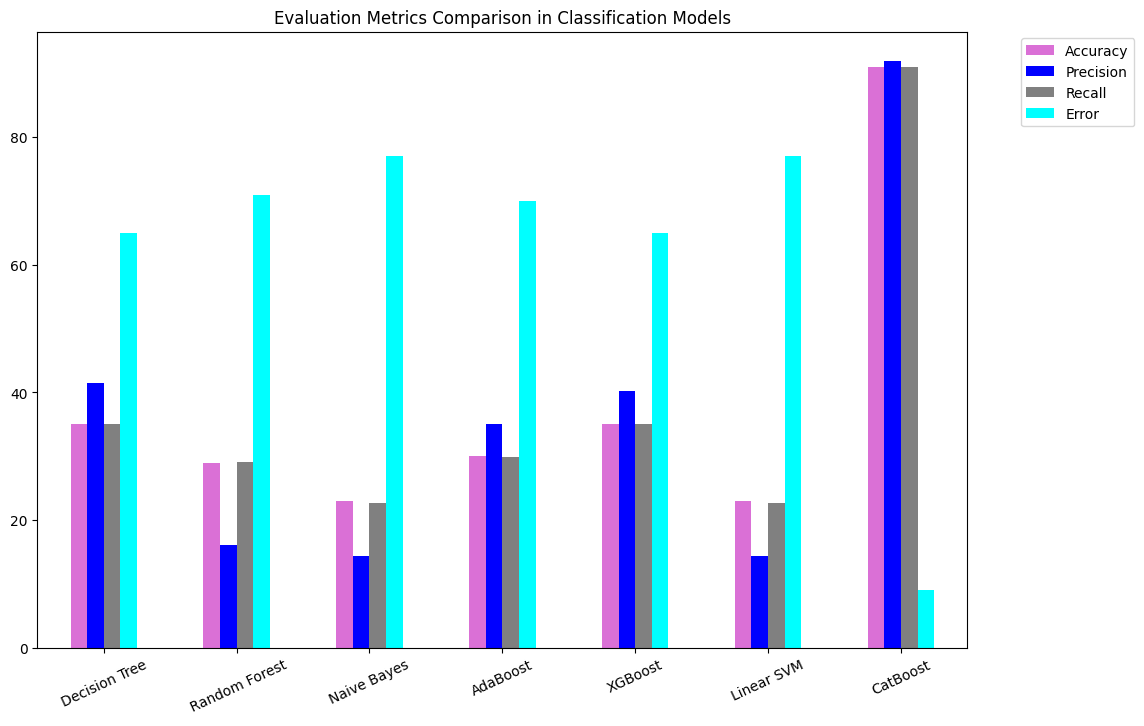

In [ ]:
data={"Accuracy":[tree_accuracy,random_forest_accuracy,naive_bayes_accuracy,adaboost_accuracy,xgboost_accuracy,accuracy_lin,cat_boost_accuracy],
     "Precision":[tree_precision,random_forest_precision,naive_bayes_precision,adaboost_precision,xgboost_precision,lin_precision,cat_boost_precision],
      "Recall":[tree_recall,random_forest_recall,naive_bayes_recall,adaboost_recall,xgboost_recall,lin_recall,cat_boost_recall],
      "Error":[tree_error,random_forest_error,naive_bayes_error,adaboost_error,xgboost_error,lin_error,cat_boost_error]};
index=["Decision Tree"," Random Forest", "Naive Bayes", "AdaBoost", "XGBoost","Linear SVM","CatBoost"];
dataframe=pd.DataFrame(data=data,index=index);
dataframe.plot.bar(rot=25,title="Evaluation Metrics Comparison in Classification Models",color=['orchid','blue','gray','aqua'])
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

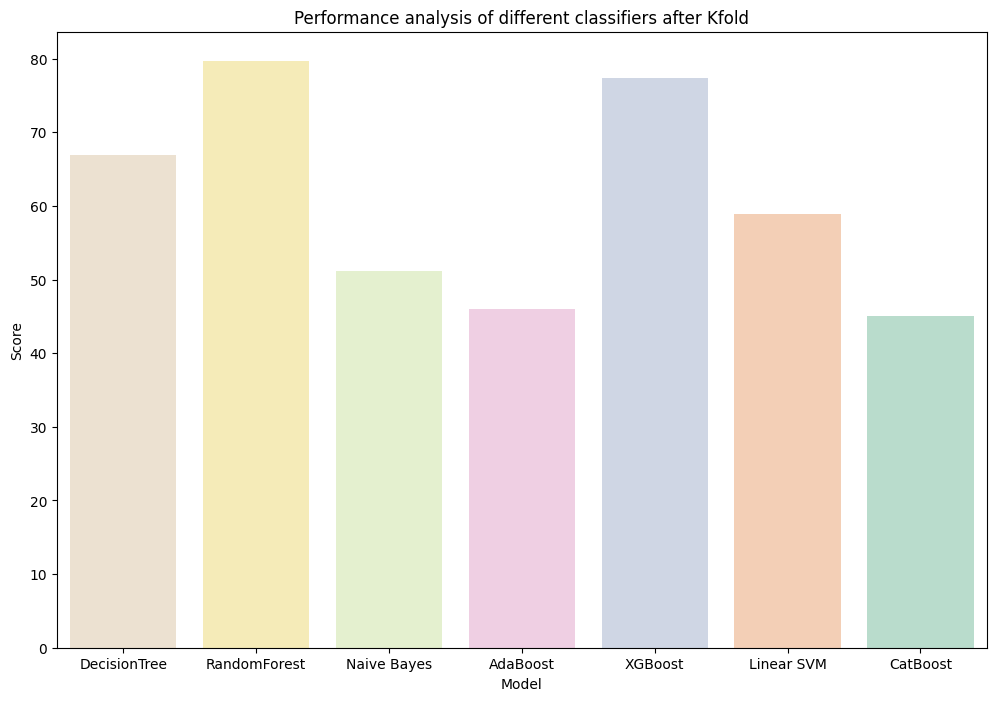

In [ ]:
data={'Model': ['DecisionTree', 'RandomForest',  "Naive Bayes",'AdaBoost', 'XGBoost','Linear SVM','CatBoost'], "Score": [float(res_dt_k), float(res_ft_k), float(res_naive_k),float(res_adaboost_k), float(res_xgboost_k),float(res_linear_svm_k),float(res_catboost_k)]}
dataPer = pd.DataFrame(data)
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Score", data=dataPer, palette="Pastel2_r")
plt.title('Performance analysis of different classifiers after Kfold')
plt.show()

In [ ]:
print("Decision Tree Acuracy score: ",res_dt_k)
print("Random Forest Acuracy score: ",res_ft_k)
print("Naive Bayes Acuracy score: ",res_naive_k)
print("AdaBoost Acuracy score: ",res_adaboost_k)
print("XGBoost Acuracy score: ",res_xgboost_k)
print("Linear SVM Acuracy score: ",res_linear_svm_k)
print("Catboost Accuracy score: ",cat_boost_accuracy)


Decision Tree Acuracy score:  66.93548387096774
Random Forest Acuracy score:  79.67479674796748
Naive Bayes Acuracy score:  51.21951219512195
AdaBoost Acuracy score:  45.96774193548387
XGBoost Acuracy score:  77.41935483870968
Linear SVM Acuracy score:  58.87096774193549
Catboost Accuracy score:  91
